# BL40A2020 Wireless Communication Systems

## Assignment  week 2: Analog communication

## Author: Vili Raunola

### A) Follow the steps done in the [notes](https://github.com/pedrohjn/wireless-comm/blob/master/Week%202/week2.ipynb) to analyze the *Conventional AM* (Sec. 3.2.2)

**1. Define a generic message $m(t) = A_\mathrm{m} \cos(2\pi f_\mathrm{m} t + \phi)$ and modulation equation [from eq. (3.5) p.96](https://www.ece.ucsb.edu/wcsl/Publications/intro_comm_systems_madhow_jan2014b.pdf) using sympy.**

In [104]:
! pip install scikit-dsp-comm
# Same imports as in the example
import sympy as sp
sp.init_printing() 
import sk_dsp_comm.sigsys as ss
import scipy.signal as signal
import scipy.fftpack as fftpack
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
import warnings
warnings.filterwarnings('ignore')

In [105]:
# Defining the m(t) in Python and some symbols
m,t,Am,fm,Ac,p,A,fc = sp.symbols('a, t, A_m, f_m, A_c, phi, A, f_c')
m = Am*sp.cos(2*sp.pi*fm*t + p)
m


In [106]:
# Defining the modulation equation from the book
g = sp.Function('g')
uAM = A*g(t)*sp.cos(2*sp.pi*fc*t) + Ac*sp.cos(2*sp.pi*fc*t)
uAM

In [107]:
# The modulated signal
modulated_signal = uAM.subs(g(t), m)
modulated_signal

**2. Numerical example:**

- Message: $m(t) =  \cos{\left (8 \pi t + \frac{\pi}{3} \right )}$
- Modulation parameters: $A = A_\mathrm{c} = 2$ and  $f_\mathrm{c} = 50$

(a) Plot the message, the transmitted signal, and their respective spectrum domain. Note that you should probably use other python libraries (scipy, numpy, and other for signal processing).

In [108]:
# Defining a new m(t) function
m = sp.cos(8*sp.pi*t + sp.pi/3)
m

In [109]:
# Checking with sympy that things are looking ok (redundant)
amp_c = 2
freq_c = 50

modulated_signal = uAM.subs(A, amp_c).subs(Ac, amp_c).subs(fc, freq_c).subs(g(t), m)
modulated_signal

In [110]:
# Converting to numpy
message = sp.lambdify(t, m, "numpy")
modulated_signal = sp.lambdify(t, uAM.subs(A, amp_c).subs(Ac, amp_c).subs(fc, freq_c).subs(g(t), m), "numpy")

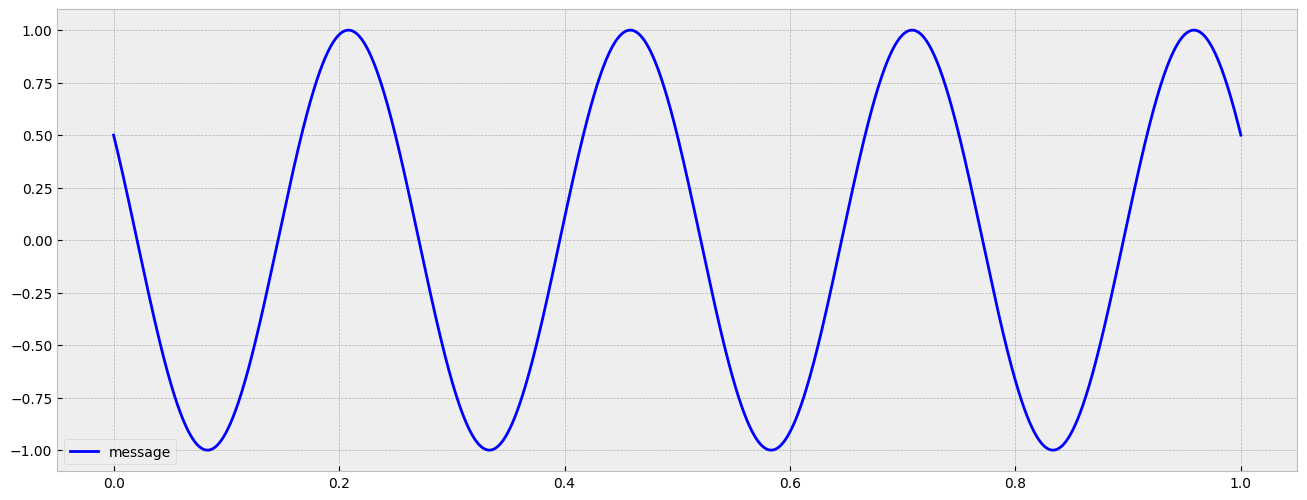

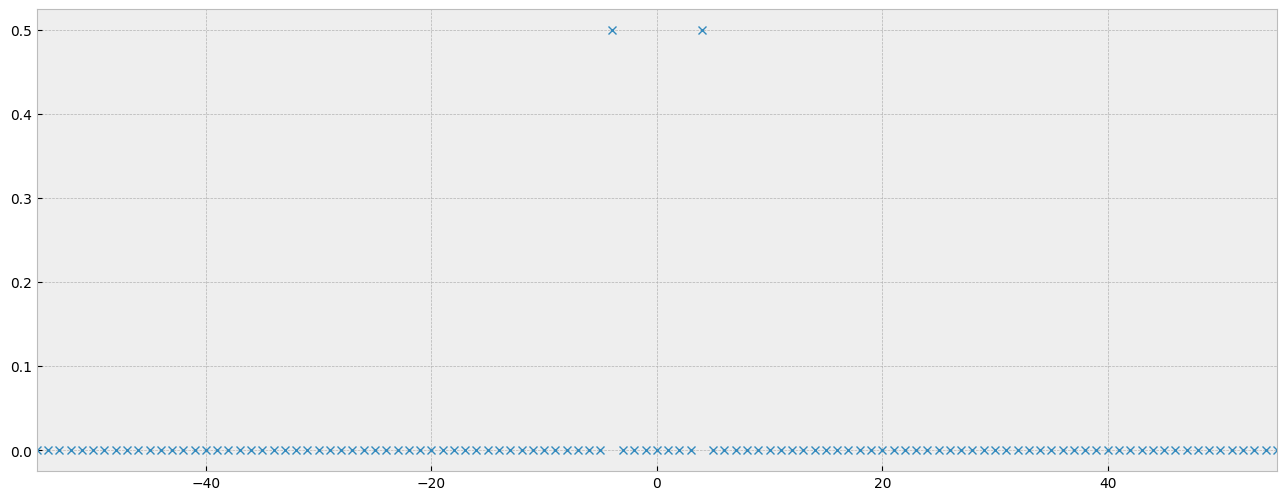

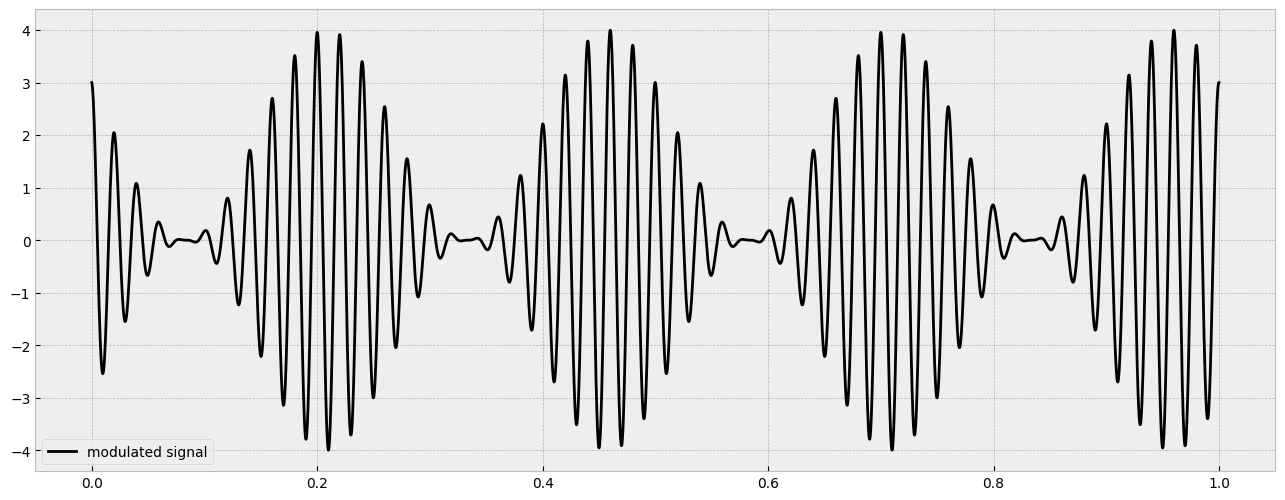

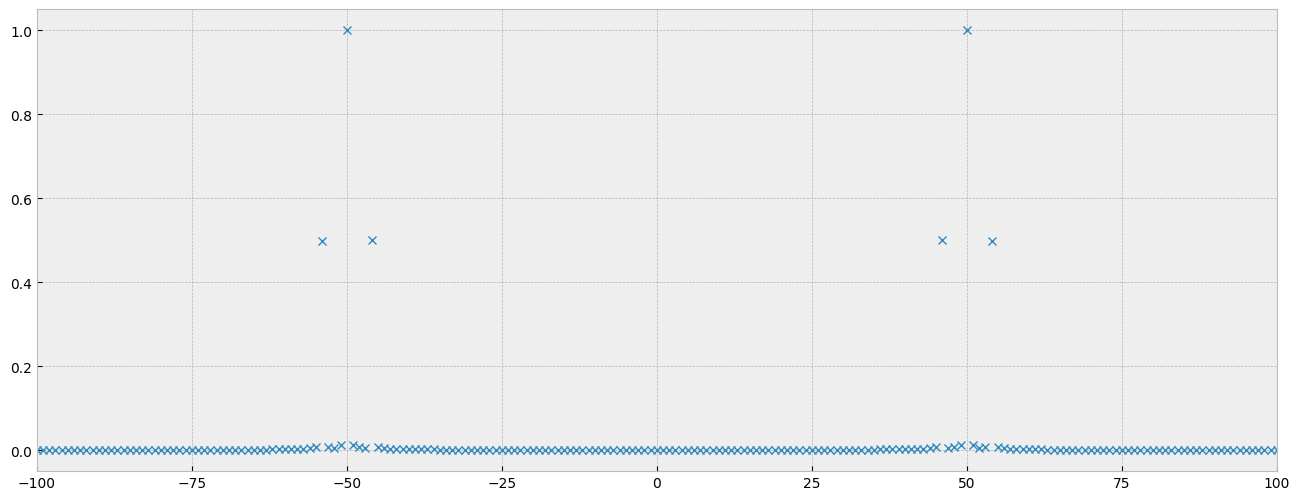

In [111]:
# Plotting the message, modulated signal and sptectrums
# Same as in the example
fp = 4000
tp = np.linspace(0, 1, fp)
plt.rcParams['figure.figsize'] = 16, 6

# Plotting the message
plt.plot(tp,  message(tp),'b-',label='message')
plt.legend(loc='lower left')
plt.show()

# Plotting the message's frequency domain
x = message(tp)
X = fftpack.fft(x) / fp
freqs = fftpack.fftfreq(len(x)) * fp
fig, ax = plt.subplots()
ax.plot(freqs, np.abs(X), 'x')
ax.set_xlim(-freq_c -5, freq_c + 5)
plt.show()

# Plotting the modulated signal
plt.plot(tp, modulated_signal(tp),'k-',label='modulated signal')
plt.legend(loc='lower left')
plt.show()

# Plotting the modulated signal's frequency domain
b = modulated_signal(tp)
B = fftpack.fft(b) / fp
freqs = fftpack.fftfreq(len(b)) * fp
fig, ab = plt.subplots()
ab.plot(freqs, np.abs(B), 'x')
ab.set_xlim(-freq_c -50, freq_c + 50)
plt.show()

(b) Implement the demodulation remembering that the message can be directly recovered by the envelope.

In [112]:
# Finding the peaks of the received signal
peaks, _ = signal.find_peaks(modulated_signal(tp), height=(0))


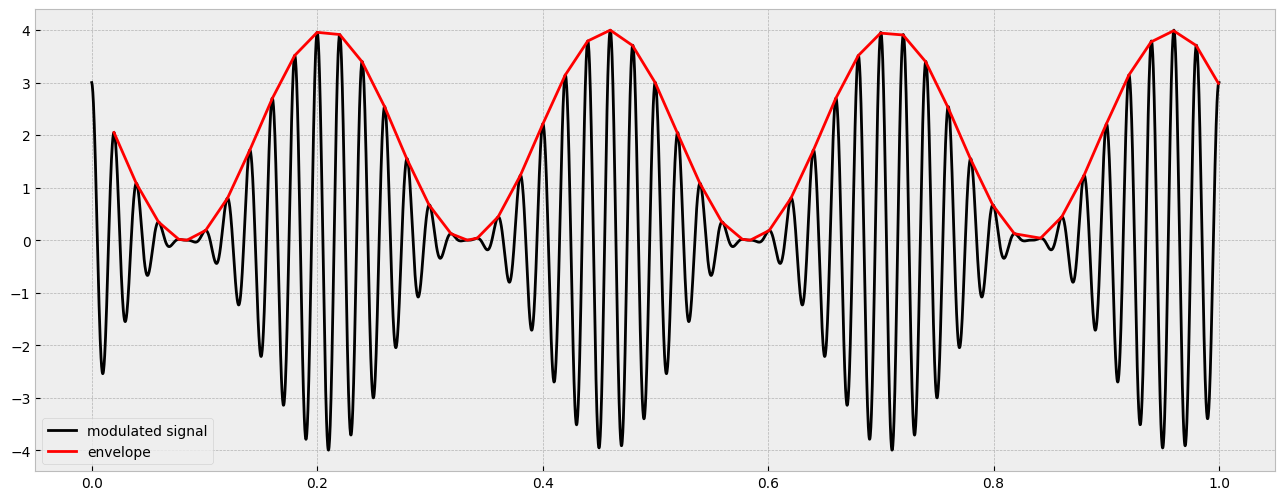

In [113]:
# Plotting the envelope and the received signal
plt.plot(tp, modulated_signal(tp),'k-',label='modulated signal')
plt.plot(peaks/fp, modulated_signal(peaks/fp), 'r-',label='envelope')
plt.legend(loc='lower left')

In [114]:
# From equation e(t)=|Am(t)+Ac| --> m(t)=(e(t)-Ac)/A
message_demodulated = (modulated_signal(peaks/fp) - amp_c)/amp_c

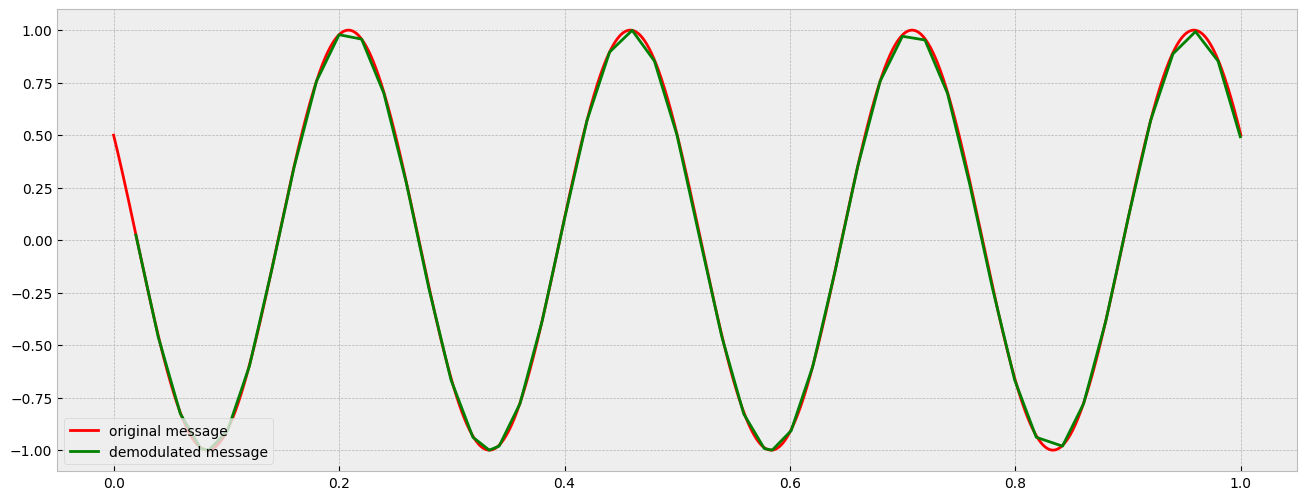

In [115]:
# Plotting the original message and the demodulated one
plt.plot(tp, message(tp), 'r', label='original message')
plt.plot(peaks/fp, message_demodulated, 'g', label='demodulated message')
plt.legend(loc='lower left')

### B) Explain with your own words and in few lines the difference between *Angle Modulations* and *Amplidute Modulations*. 

The basic difference between the two modulation methods is that in amplitude modulation the focus is to add the transmitted message to the signal's amplitude from which it can be decoded at the receiver's end. The angle modulation on the other hand inserts the original message to the signal's frequency or to the phase and is decoded from there at the receivers end. There are some distinct benefits of using either of the modulation methods. One of the reasons to use for example angle modulation is that it is more resistant to background noise since the message travels in the frequency/phase of the signal instead of the amplitude which gets distorted way more from background noice.